In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sample-sales-data/sales_data_sample.csv


### Outliers
---- 
Outliers are observations that are significantly distant from other observations. These do not follow the general trend of the data. Outliers can indicate variation or error in the data. Outliers in a single variable/column are called **univariate** while outliers in multiple variables/columns are called **multivariate**.

import dataset 

In [145]:
df = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding='unicode_escape')
display(df.head(5))

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Outlier detection
----
Outlier detection is very important step in data cleaning and exploring. 
Outliers can be detected both visually and mathematically. Some plots are very helpful in visualizing outliers, such as **box plots** and **scatter plots**. However, it is sometimes tricky to decide whether or not to remove the outliers. We should remove outliers when we are certain that these outliers were results of some errors.

#### Box plot
----

Box plots, by definition, plot outliers as points and group the rest of the observations. The criteria of a box plot for classifying a point as an outlier is if the point is greater than $Q3 +(1.5∗IQR)$ or lower than $Q1-(1.5*IQR)$
where, 
where $Q1 = First Quartile$
$Q3 = Third Quartile$

$IQR = Inter Quartile Range = Q3-Q1$

![bloxplot](https://miro.medium.com/max/11475/1*2c21SkzJMf3frPXPAR_gZA.png)

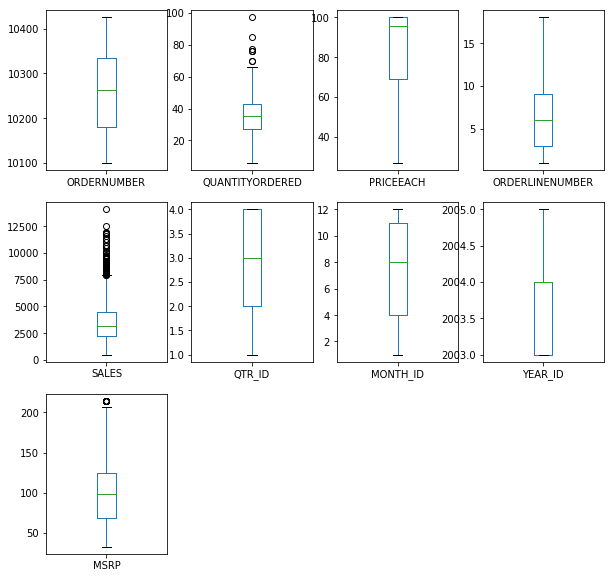

In [146]:
import matplotlib.pyplot as plt

df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

As we can see here `MSRP` has only one outlier, `SALES` have many outlier, and `QUANTITYORDERD` has also some outlier. 

### Filtering outlier
----
We can also use quartile ranges to filter for outliers. Let’s see an example of that below. We will be filtering rows that are outliers in all three variables.

original shape of dataset : (2823, 25)
filtered dataset shape :  (2719, 25)


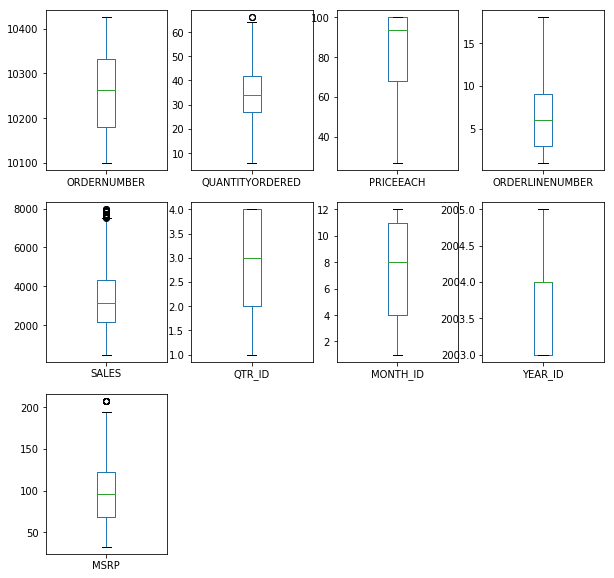

In [147]:
print('original shape of dataset :',df.shape)

cols = ['SALES', 'MSRP','QUANTITYORDERED']
new_df = df[cols]

#calculation 
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3-Q1
maximum = Q3+1.5*IQR
minimum = Q1-1.5*IQR
#print(minimum)

#filter outlier 
cond = (new_df <= maximum) & (new_df >= minimum)
'''
we specify that the condition should be true for all three columns by using the all function with axis=1 argument.
This gives us a list of True/False against each row. 
If a row has all three True values, then it gives a True value to that row
'''
cond = cond.all(axis=1)
df = df[cond]
print('filtered dataset shape : ',df.shape)

#plot again to check that if has any outlier
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(10,10), layout=(3,4))
plt.show()

we can see that, now we have very few outlier in the box plot.

### Scatter Plot
----
Scatter plots are a handy way of looking at point and collective outliers. In this below code we choose only 3 columns that only make sense. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feadb47c550>,
      dtype=object)

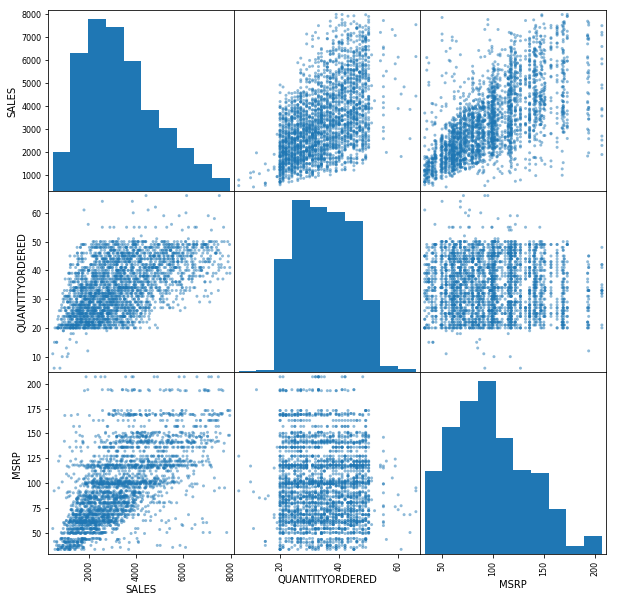

In [148]:
new_df = df = df[['SALES','QUANTITYORDERED','MSRP']]
pd.plotting.scatter_matrix(new_df, figsize = (10,10))

we can easily see here the outliers. 

### Z-Score
----

A Z-score is a numerical measurement used in statistics of a value's relationship to the mean (average) of a group of values. Z scores are used in statistics to study variance of data. We can use z-scores to filter outliers easily.
>  It used to get an idea about the spread of the data

shape of original data : (2719, 3)
shape of filtered data :  (2712, 3)


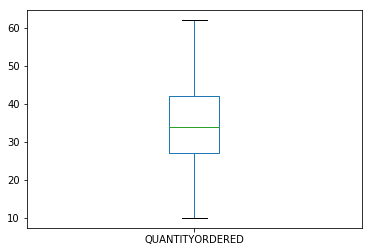

In [149]:
print('shape of original data :',df.shape)

mean = df['QUANTITYORDERED'].mean()
std_dev = df['QUANTITYORDERED'].std()

# find z scores
z_scores = (df['QUANTITYORDERED'] - mean) / std_dev
z_scores = np.abs(z_scores)

#print(z_scores.min())

#filter data
df = df[z_scores<3]
print('shape of filtered data : ',df.shape)

#plot data
df['QUANTITYORDERED'].plot(kind='box')
plt.show()

> why we chose 3 when filtering data ? in normally distributed data, approximately 97% of the data lies inside 3 standard deviations. So, if a data value has a z-score greater than 3, it is an outlier.